## Problem mixed regression

Consider this data (see next markdown block for explanation)

Text(0, 0.5, 'y')

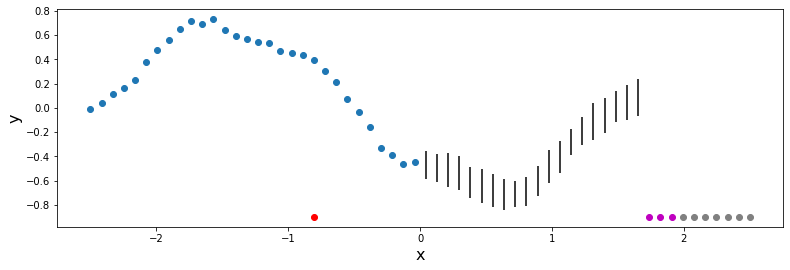

In [49]:
import numpy as np
import matplotlib.pyplot as plt

#X for numeric data
Xn=np.array([[0.        ],
       [0.08474576],
       [0.16949153],
       [0.25423729],
       [0.33898305],
       [0.42372881],
       [0.50847458],
       [0.59322034],
       [0.6779661 ],
       [0.76271186],
       [0.84745763],
       [0.93220339],
       [1.01694915],
       [1.10169492],
       [1.18644068],
       [1.27118644],
       [1.3559322 ],
       [1.44067797],
       [1.52542373],
       [1.61016949],
       [1.69491525],
       [1.77966102],
       [1.86440678],
       [1.94915254],
       [2.03389831],
       [2.11864407],
       [2.20338983],
       [2.28813559],
       [2.37288136],
       [2.45762712]])-2.5
#scalar observation
Yn=np.array([[ 0.        ],
       [ 0.0461782 ],
       [ 0.10250479],
       [ 0.17591232],
       [ 0.26779933],
       [ 0.3732587 ],
       [ 0.48207301],
       [ 0.58120776],
       [ 0.65811807],
       [ 0.70395845],
       [ 0.71581183],
       [ 0.69732422],
       [ 0.65757262],
       [ 0.60848162],
       [ 0.56150536],
       [ 0.52449378],
       [ 0.49961032],
       [ 0.48287594],
       [ 0.46546318],
       [ 0.43637862],
       [ 0.38578669],
       [ 0.30804959],
       [ 0.20363598],
       [ 0.0793638 ],
       [-0.05309667],
       [-0.1800518 ],
       [-0.28916964],
       [-0.3724907 ],
       [-0.42823811],
       [-0.4609328 ]])+np.random.randn(Xn.shape[0],1)*0.02


#Preference data
Xall= np.linspace(0,5,60)-2.5
Pref=np.array([[20, 50],
 [20, 51],
 [20, 52],
 [53, 20],
 [54, 20],
 [55, 20],
 [56, 20],
 [57, 20],
 [58, 20],
 [59, 20]])

# X coordinates of the interval data
Xi=np.array([[2.54237288],
       [2.62711864],
       [2.71186441],
       [2.79661017],
       [2.88135593],
       [2.96610169],
       [3.05084746],
       [3.13559322],
       [3.22033898],
       [3.30508475],
       [3.38983051],
       [3.47457627],
       [3.55932203],
       [3.6440678 ],
       [3.72881356],
       [3.81355932],
       [3.89830508],
       [3.98305085],
       [4.06779661],
       [4.15254237]])-2.5

#upper and lower extreme of the interval
Y_interval= np.array([[-0.58360213, -0.35993475],
       [-0.61534888, -0.37717895],
       [-0.65684238, -0.37481256],
       [-0.68147946, -0.3999138 ],
       [-0.74139145, -0.49142111],
       [-0.78178321, -0.50245948],
       [-0.82034213, -0.54445637],
       [-0.83996895, -0.58295252],
       [-0.81549734, -0.60749871],
       [-0.80814436, -0.56807399],
       [-0.72923644, -0.47986084],
       [-0.61806226, -0.34865074],
       [-0.54048248, -0.27052643],
       [-0.39268677, -0.17434009],
       [-0.302552  , -0.07549363],
       [-0.26417252,  0.04009656],
       [-0.20863269,  0.08165917],
       [-0.12008343,  0.1393311 ],
       [-0.09593256,  0.18998151],
       [-0.06373958,  0.23847231]])

plt.figure(figsize=(13,4))
plt.scatter(Xn,Yn)
for i in range(len(Xi)):
    plt.vlines(Xi[i],Y_interval[i,1],Y_interval[i,0])

yref=-0.9
plt.scatter(Xall[20],yref,color='red')
for i in range(Pref.shape[0]):
    ii=Pref[i,:]
    if ii[0]==20:        
        plt.scatter(Xall[ii[1]],yref,color="m")
    else:
        plt.scatter(Xall[ii[0]],yref,color="gray")
plt.xlabel("x", fontsize=16)
plt.ylabel("y", fontsize=16)

This is an example of mixed scalar, interval and preference regression problem.
The  left points are scalar observations, the vertical bars represent interval data and the right points represent preferences. In other words, here we only know that the value of the functions computed at these violet points is less that the value of the function at this red point, and the value of the function computed at these grey points is greater than the value of the function computed at the red point. 

Your goal is to write a probabilistic model, using a polynomial regression function, to predict the distribution of the $y$ at $x=2.5$. Also plot the mean regression line and 200 sampled regression lines to visualise  the uncertainty.

How does the prediction change if preference data are not used (that is if you only use scalar and interval data)?


In [50]:
W_train=np.zeros((Pref.shape[0],Xall.shape[0]))
for i in range(W_train.shape[0]):
    W_train[i,Pref[i,0]]=1
    W_train[i,Pref[i,1]]=-1

In [103]:
import pymc3 as pm
import theano.tensor as tt

def custom_dist_logp(mu,sigma,yl,yu):
    return pm.Bernoulli.dist(1e-100+0.5*tt.erfc(-(yu-mu)/sigma/np.sqrt(2))).logp(1.0)+pm.Bernoulli.dist(1e-100+0.5*tt.erfc((yl-mu)/sigma/np.sqrt(2))).logp(1.0)

deg = ? #degree of the polynomial
Xscalar=Xn.reshape(-1,1)
for i in range(1,deg+1):
    Xscalar=np.hstack([Xscalar,Xn.reshape(-1,1)**i])#polynomial features
Xinterval=Xi.reshape(-1,1)
for i in range(1,deg+1):
    Xinterval=np.hstack([Xinterval,Xi.reshape(-1,1)**i])#polynomial features
Xpref=Xall.reshape(-1,1)
for i in range(1,deg+1):
    Xpref=np.hstack([Xpref,Xall.reshape(-1,1)**i])#polynomial features
    


mymodel=pm.Model()
with mymodel:
    alpha  = pm.Normal('alpha', 0.0,50) 
    beta  = pm.Normal('beta', 0.0,50, shape=(Xpref.shape[1],))#shape=4 because there are three beta parameters
    sigma = pm.Gamma('sigma',1,1)
    #COMPLETE THE MODEL
    
with mymodel:
    approx = pm.fit(150000,method='advi')# 

Average Loss = 104.49: 100%|█████████▉| 149984/150000 [00:41<00:00, 3454.87it/s]  Interrupted at 149,999 [99%]: Average Loss = 44,867


This is the solution you should obtain

Text(0, 0.5, 'y')

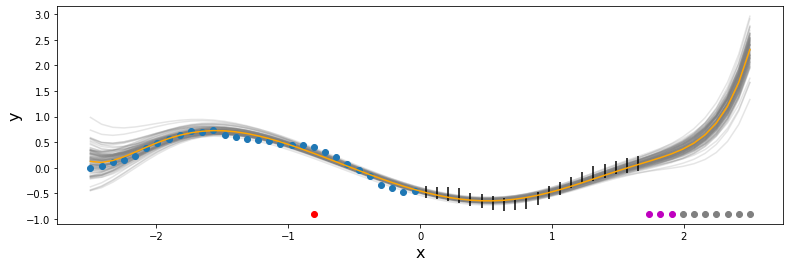

In [104]:
#we sample from the posterior
posterior=approx.sample(5000)

plt.figure(figsize=(13,4))
beta_est=np.mean(posterior['beta'],axis=0)
alpha_est=np.mean(posterior['alpha'],axis=0)
plt.plot(Xpref[:,0],Xpref.dot(beta_est)+alpha_est,'orange')
for i in range(100):
    plt.plot(Xpref[:,0],Xpref.dot(posterior['beta'][i,:])+posterior['alpha'][i],'gray',alpha=0.2,Zorder=0)
    

plt.scatter(Xn,Yn)
for i in range(len(Xi)):
    plt.vlines(Xi[i],Y_interval[i,1],Y_interval[i,0])

yref=-0.9
plt.scatter(Xall[20],yref,color='red')
for i in range(Pref.shape[0]):
    ii=Pref[i,:]
    if ii[0]==20:        
        plt.scatter(Xall[ii[1]],yref,color="m")
    else:
        plt.scatter(Xall[ii[0]],yref,color="gray")
plt.xlabel("x", fontsize=16)
plt.ylabel("y", fontsize=16)


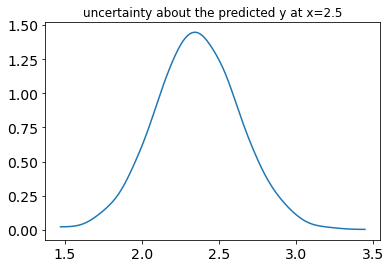